Modules

In [2]:
import os
import sys
sys.path.append('..')

In [3]:
import biota.models as biomodels
import matplotlib.pyplot as plt

---------------------------------------------

Specify bioreactor parameters and construct bioreactor class instance from them.
Values are derived from the 20,000 litre stirred aerated tank example case from Humbird https://doi.org/10.31224/osf.io/795su . Fed batch operation is considered here, no perfusion.

In [4]:
workingVolume = 20000
tankDiameter = 2.34
impellerDiameter = tankDiameter/3
rpm = 42.3
backPressure = 1.3
superficialVel = 0.004
moleFracO2 = 0.21
moleFracCO2 = 0.03
initVol = 0.76 * workingVolume
initCells = 4e6
temp = 310
powerNumber = 5
mediumDensity = 1000
mediumViscosity = 9e-4
vesselVolDay = 0.0
perfLactateRate = 5.0
perfAmmrate = 5.0

STR_Humbird_20kl = biomodels.Bioreactor(wv=workingVolume,t=tankDiameter,d=impellerDiameter,n=rpm,p_back=backPressure,u_s=superficialVel,mf_O2_gas=moleFracO2,mf_CO2_gas=moleFracCO2,v0=initVol,ns=initCells,Temp=temp,
                                     Np=powerNumber,rho=mediumDensity,mu=mediumViscosity,vvd=vesselVolDay,perfAMM=perfAmmrate,perfLAC=perfLactateRate)


-----------------------------------------

Specify cell parameters and create instance of cell class from them. Values are derived from the un-enhanced CHO model of Humbird https://doi.org/10.31224/osf.io/795su for the two doublings production scenario.

In [5]:
growthRate = 0.029

glutamineUptakeRate = 0
glucoseUptakeRate = 0
oxygenUptakeRate = 0.49
uptakeList = [glutamineUptakeRate, glucoseUptakeRate, oxygenUptakeRate]

carbonDioxideProdRate = 0.593
ammoniaProductionRate = 0.013571
lactateProductionRate = 0.135707
prodList = [carbonDioxideProdRate, ammoniaProductionRate, lactateProductionRate]

massDensity = 1030
cellRadius = 18e-6
wetmass = 3000
dryMassFraction = 0.3

ammoniaLimit = 5
lactateLimit = 50
CO2Limit = 100
turbLengthLimit = 20e-6
limitsList = [ammoniaLimit, lactateLimit, CO2Limit, turbLengthLimit]


cell_Humbird = biomodels.Cell(mu=growthRate,uptakes=uptakeList,prod=prodList,rho=massDensity,rad=cellRadius,wetmass=wetmass,dmf=dryMassFraction,limits=limitsList)

-------------------------------------------------

Specify bounds and resolution for the brute force optimisation.

In [6]:
count = 50
bioreactor = STR_Humbird_20kl
cell = cell_Humbird
doublings = 7
rpmlims = (1,75)
supervellims = (0.0001,0.005)
celldenslims = (5.9e5,6.1e5)
showGraphs = True

Execute brute force optimisation function. 

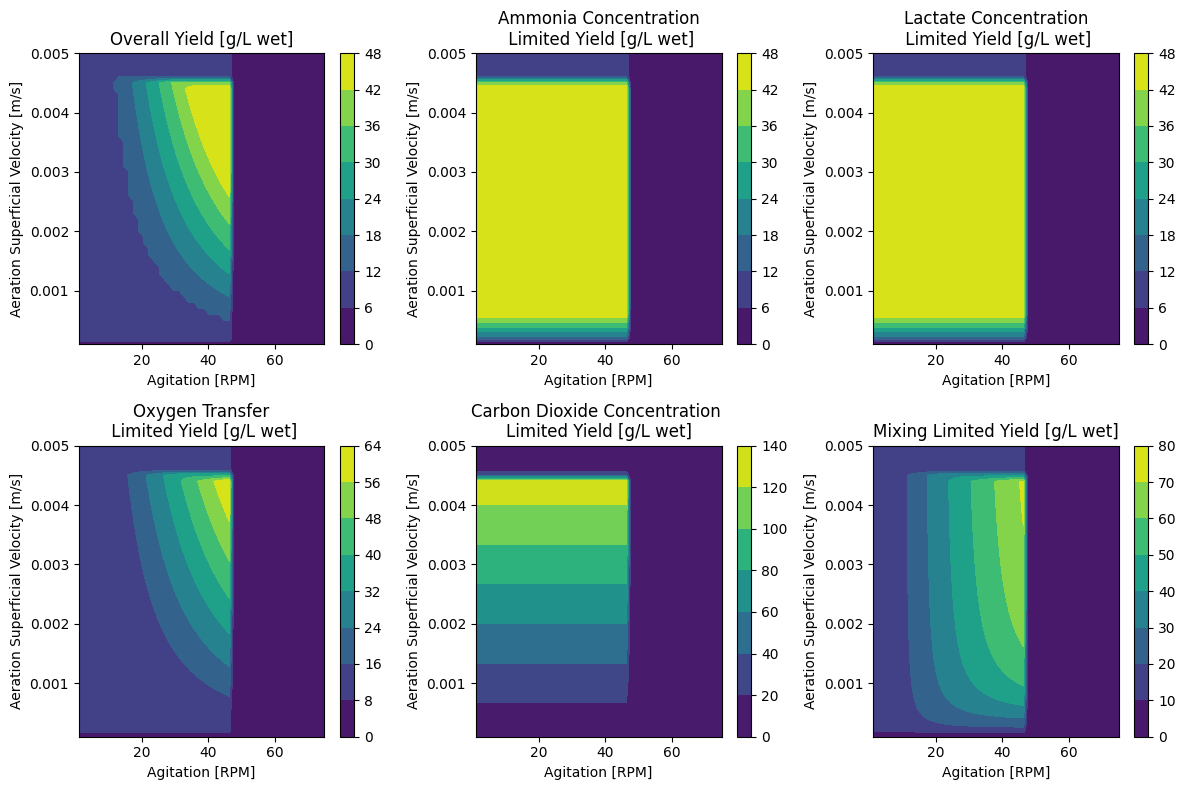

In [7]:
a = biomodels.brute(count=count,b=bioreactor,c=cell,dbls=doublings,rpmlims=rpmlims,uslims=supervellims,nslims=celldenslims,graphs=showGraphs)

-------------------------------------------------------------------

Dataframe returned by brute force optimisation function, showing the maximum overall yield and the maximum per constraint.

In [8]:
a

,Constraint,Maximum Yield [g/L wet]
0,overall,47.632072
1,ammonia,47.632072
2,lactate,47.632072
3,CO2,131.708818
4,kla,63.668296
5,mixing,71.497455
6,hydrodynamic stress,386.966163
7,superficial velocity,332.760836


-------------------------------------------------

------------------------------